In [4]:
import os
import json

models = ["Logistic Regression", "Decision Tree", "Random Forest", "MLP Classifier"]

for model in models:
    os.makedirs(model, exist_ok=True)
    
    # Create .ipynb file with valid JSON structure
    notebook_content = {
        "cells": [
            {
                "cell_type": "markdown",
                "metadata": {},
                "source": [f"# {model} Notebook\n"]
            }
        ],
        "metadata": {},
        "nbformat": 4,
        "nbformat_minor": 5
    }
    with open(os.path.join(model, f"{model}.ipynb"), 'w') as f:
        json.dump(notebook_content, f, indent=4)
    
    # Create .json file
    with open(os.path.join(model, f"{model}.json"), 'w') as f:
        f.write(f'{{"model": "{model}"}}')

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  Logistic Regression  0.856134   0.740289  0.619898  0.674766  0.909826   
1        Decision Tree  0.860279   0.804067  0.554847  0.656604  0.906503   
2        Random Forest  0.867649   0.775781  0.633291  0.697331  0.920707   
3       MLP Classifier  0.864271   0.750000  0.654337  0.698910  0.917172   

   Fidelity  R2_Score  Mean Absolute Error  
0  0.856134  0.212939             0.143866  
1  0.860279  0.235619             0.139721  
2  0.867649  0.275938             0.132351  
3  0.864271  0.257458             0.135729  


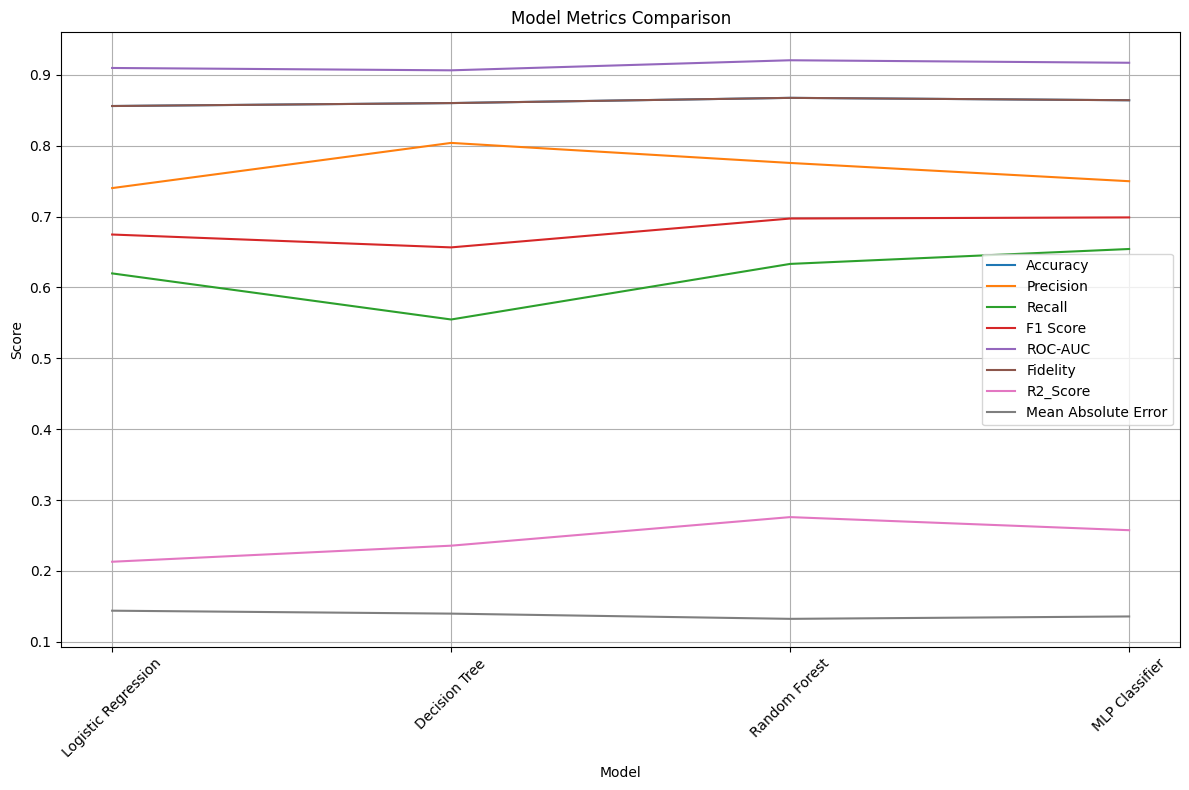

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics from individual files
lr_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\binary\adult_income\Logistic Regression\logistic_regression_metrics.csv")
dt_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\binary\adult_income\Decision Tree\decision_tree_metrics.csv")
rf_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\binary\adult_income\Random Forest\random_forest_metrics.csv")
mlp_metrics = pd.read_csv(r"C:\Users\aryan\Desktop\XAI\XAI_Models\binary\adult_income\MLP Classifier\mlp_classifier_metrics.csv")

# Combine all metrics into a single DataFrame
combined_metrics = pd.concat([lr_metrics, dt_metrics, rf_metrics, mlp_metrics], ignore_index=True)

# Display combined metrics
print(combined_metrics)

# Save combined metrics as CSV (optional)
combined_metrics.to_csv("combined_metrics.csv", index=False)

# Plot comparison
plt.figure(figsize=(12, 8))
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "Fidelity", "R2_Score", "Mean Absolute Error"]
for metric in metrics_to_plot:
    plt.plot(combined_metrics["Model"], combined_metrics[metric], label=metric)

plt.title("Model Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
